# Lab2 Yanis Aït El Cadi

In [118]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt    
import random

## 4.1

(784 * 32 + 32) + (32 * 32 + 32) + (32 * 10 + 10) = 26 506 parameters by following theory.

Which makes sense considering the model provides 26 506 optimizable parameters.

# 5.1

### Data & Model

In [145]:
train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")

x_train = train_data[0].reshape(-1,784).astype(float) / 255
y_train = train_data[1]

x_test = test_data[0].reshape(-1,784).astype(float) / 255
y_test = test_data[1]

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation=None, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [148]:
def SGD(untrained_model,initial_step,batch_size=5):
    model =  tf.keras.models.clone_model(untrained_model)
    error_list = []
    grad_norm = np.inf
    k = 0
    last_mean_error = 10000000
    stop = False
    while not stop:
        step = initial_step / np.sqrt(k+1)
        k += 1

        # Take a random batch
        z = random.randint(0,x_train.shape[0]-batch_size)
        x_train_batch = x_train[z:z+batch_size]
        y_train_batch = y_train[z:z+batch_size]

        with tf.GradientTape() as tape:
            logits = model(x_train_batch)
            loss_value = loss(y_train_batch, logits)

        grad = tape.gradient(loss_value, model.trainable_weights)

        # grad_norm = 0 
        # for i in range(len(grad)):
        #     grad_norm += 1/len(grad) * tf.norm(grad[i]).numpy()

        new_weights = model.trainable_weights.copy()
        for i in range(len(new_weights)):
            new_weights[i] = new_weights[i] - step * grad[i]
        model.set_weights(new_weights)

        if k % 10 == 0:
            samples_for_evaluation = np.random.randint(0, 10000, 1000)
            logits = model(x_train[samples_for_evaluation])
            error = loss(y_train[samples_for_evaluation], logits).numpy()
            error_list.append([k,np.linalg.norm(error)])
            # print(grad_norm)

        if k % 1000 == 0:
            mean_error = sum(error_list[-100:][1])/100
            change = np.abs(mean_error-last_mean_error)/(last_mean_error+mean_error)
            print("relative change:",round(change,2))
            if change < 0.1:
                stop = True
            else :
                last_mean_error = mean_error
    
    print("Relative change in the error mean gets bellow 10 percent after",k, "iterations")
    return model,error_list

# 5.2

relative change: 1.0
relative change: 0.96
relative change: 0.33
relative change: 0.2
relative change: 0.14
relative change: 0.11
relative change: 0.09
Relative change in the error mean gets bellow 10 percent after 7000 iterations


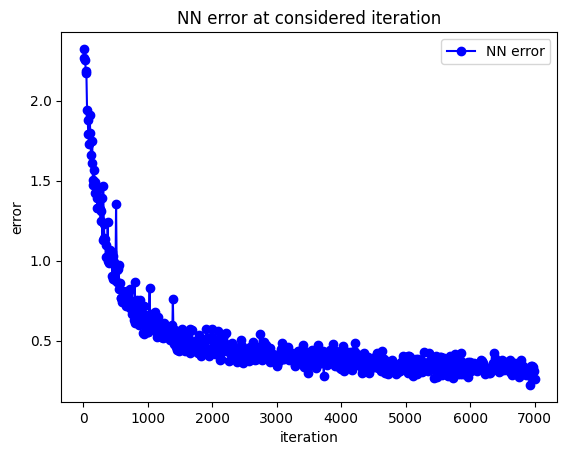

In [149]:
trained_model,err = SGD(model,1) # This should take around a minute 

x_values = [error[0] for error in err]
y_values = [error[1] for error in err]

# Plot the function and the points
plt.plot(x_values, y_values, label='NN error', marker='o', linestyle='-', color='blue')
plt.xlabel('iteration')
plt.ylabel('error')
plt.title('NN error at considered iteration')
plt.legend()
plt.show()

# 6.1

Already did it in 5.1

# 6.2

Using mini-batches in training neural networks offers several advantages compared to the extreme alternatives of processing only one element of data every epoch (pure stochastic gradient descent, SGD) or the entire dataset in each epoch (batch gradient descent). 

The key advantages of using mini-batches include:

Efficiency: Mini-batches allow for efficient vectorized operations and better utilization of parallel processing capabilities, making computations faster.

Reduced Variance: Mini-batches provide a balance between the low-variance updates of pure SGD and the high-variance updates of batch gradient descent, leading to more stable convergence.

Smoothed Objective Function: Mini-batches offer a smoothed estimate of the objective function, stabilizing the optimization process and reducing sensitivity to noise in individual data points.

Balance Between Efficiency and Noise: Mini-batches strike a balance between the efficiency of processing larger chunks of data and the noise introduced by using individual data points, leading to faster convergence.

# 6.3

I added the "batch_size" parameter which will be equal to 5 if not specified by the user.

# 7.1

In [150]:
# Training Set error before SGD
btraining_logits = model(x_train)
btraining_error = loss(y_train, btraining_logits).numpy()

# Testing Set error before SGD
btesting_logits = model(x_test)
btesting_error = loss(y_test, btesting_logits).numpy()

# Training Set error after SGD
training_logits = trained_model(x_train)
training_error = loss(y_train, training_logits).numpy()

# Testing Set error after SGD
testing_logits = trained_model(x_test)
testing_error = loss(y_test, testing_logits).numpy()

print("Training error before SGD:",round(btraining_error,3))
print("Training error after SGD:",round(training_error,3))

print("\n")

print("Testing error before SGD:",round(btesting_error,3))
print("Testing error after SGD:",round(testing_error,3))

print("\n")

print("Training error difference:",round(btraining_error-training_error,3))
print("Testing error difference:",round(btesting_error-testing_error,3))

Training error before SGD: 2.325
Training error after SGD: 0.324


Testing error before SGD: 2.325
Testing error after SGD: 0.326


Training error difference: 2.001
Testing error difference: 1.999
